Importamos librerias y ealizaremos un procesamiento del conjunto de datos que disponemos para ver si es necesario realizar
alguna modificación.
Cargamos el archivo a Jupyter y lo cargamos mediante la función pd.read_excel.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_excel("Lligues europees UEFA.xlsx")


#Nos devuelve las primeras filas del dataframe
df.head

In [78]:
#Con el metodo .describe() presentamos un resumen de la estadistica descriptiva general 
#de las columnas numericas del dataframe número de muestras, media, la desviación estándar, el valor mínimo, máximo, 
#la mediana y los valores correspondientes a los percentiles 25% y 75%.

#Oberrvamos que cada columan contiene 98 filas.
#la media más alta es la variable Attendance, que por una parte es normal debido a que son las personas
#que asisten al estadio y es un cantidad considerable respecto al resto de columnas. Este dato esta relacionado
#indirectamente con la std, cuyo dato más alto, también es la Attendace.


df.describe()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.500000,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,28.434134,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,25.250000,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,49.500000,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,73.750000,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,98.000000,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


In [80]:
# .info nos devuelve una serie de información, pero en este caso nos fijamos en el tipo de datos que contenemos
#en la tabla: Int, object y float
#Obersvamos que las columnas están bien categorizadas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [5]:
#Buscamos datos duplicados y lo sumamos
df.duplicated().sum()

0

In [6]:
#Buscamos datos nulos y lo sumamos
df.isnull().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

El p-valor de la prueba de Shapiro-Wilk es 3.7994775539118564e-06. ¿Rechazamos la HO? True


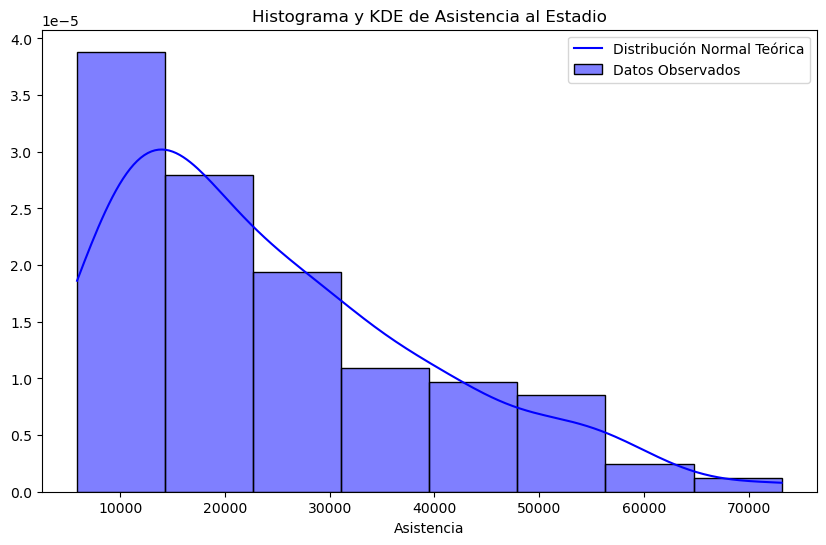

In [32]:
#Exercici 1
#Seleccionamos un atributo del conjunto de datos,Attendance, y aplicamos el test shapiro.

#Planteamos la hipotesis
#hipotesis nula H0: tiende a una distribución normal
#hipotesis alternativa H1: no tiende a una distribución normal

#Si Pvalor >= 0.05(nivel de signficación)-->No Rho
#Si Pvalor < 0.05 (nivel de significacion)-->Rho

from scipy.stats import shapiro

#Seleccionamos un atributo del conjunto de datos 
Asistencia_Estadio = df['Attendance']

# Realizamos la prueba de normalidad de Shapiro-Wilk
stat, p_value_shapiro = shapiro(Asistencia_Estadio)

# Verificamos si rechazamos la hipótesis nula con un nivel de signifiación del 5%
alfa = 0.05
rechaza_hipotesis_nula = p_value_shapiro < alfa

# Imprimimos el resultado
print(f'El p-valor de la prueba de Shapiro-Wilk es {p_value_shapiro}. ¿Rechazamos la H0? {rechaza_hipotesis_nula}')


# Graficar el histograma de la distribución
plt.figure(figsize=(10, 6))
sns.histplot(Asistencia_Estadio, kde=True, color='blue', stat='density')
plt.title('Histograma y KDE de Asistencia al Estadio')
plt.xlabel('Asistencia')
plt.ylabel('')

# Agregar leyendas y anotaciones
plt.legend(['Distribución Normal Teórica', 'Datos Observados'])
plt.annotate(f'P-valor: {p_value_shapiro:.4f}', xy=(xmin + 50, 0.005), fontsize=12)

# gráfica
plt.show()

#Rechazamos la Hipotesis nula, por lo que la variable Attendance no se distribuye como una normal.



In [76]:
#Exercici 2

#Seleccionamos un atributo del conjunto de datos,Last 5 y Goalkeeper, y aplicamos el t-student. 
#En este caso utilizaremos el Anderson-Darling Test previo a aplicar la T-student.

from scipy.stats import anderson

#Planteamos la hipotesis
#hipotesis nula H0: la muestra tiene una distribución gaussiana.
#hipotesis alternativa H1: la muestra no tiene una distribución gaussiana.

# Supongamos que 'GF' y 'GA' son las columnas reales de tu DataFrame
goles_a_favor = df['GF'].dropna()
goles_en_contra = df['GA'].dropna()

# Aplica el test de Anderson-Darling a cada muestra
estadistico_ad1, critico_ad1, niveles_significancia_ad1 = anderson(goles_a_favor)
estadistico_ad2, critico_ad2, niveles_significancia_ad2 = anderson(goles_en_contra)

# Imprime los resultados para cada muestra
print(f'Muestra "GF" - Estadístico de Anderson-Darling: {estadistico_ad1}, P-valor: {niveles_significancia_ad1[2]}')
print(f'Muestra "GA" - Estadístico de Anderson-Darling: {estadistico_ad2}, P-valor: {niveles_significancia_ad2[2]}')


Muestra "GF" - Estadístico de Anderson-Darling: 1.6389936988552591, P-valor: 5.0
Muestra "GA" - Estadístico de Anderson-Darling: 0.40379905947598616, P-valor: 5.0



Planteamos la hipotesis
hipotesis nula H0: Las medias de las muestras son iguales
hipotesis alternativa H1: Las medias de las muestras no son iguales

#Si Pvalor >= 0.05(nivel de signficación)-->No Rho
#Si Pvalor < 0.05 (nivel de significacion)-->Rho

# Seleccionamos los atributos 
Ultimos_partidos = pd.to_numeric(df['GF'], errors='coerce')
Portero = pd.to_numeric(df['GA'], errors='coerce')

# Realizamos la prueba t de Student para muestras independientes
_, p_value_ttest = ttest_ind(Ultimos_partidos.dropna(), Portero.dropna())

# Verificamos si rechazamos la hipótesis nula con un nivel de signifiación del 5%
alfa = 0.05
rechaza_hipotesis_nula_ttest = p_value_ttest < alfa

# Imprimimos el resultado
print(f'El p-valor de la prueba t de Student es {p_value_ttest}. ¿Rechazamos la hipotesis nula? {rechaza_hipotesis_nula_ttest}')


In [25]:
# Exercici 3

#Selecciona tres atributos; W,D,L  y aplicamos Anova

#Planteamos la hipotesis:
#hipotesis nula H0
#hipotesis alternativa H1:

from scipy.stats import f_oneway

# Seleccionamos los atributos
Victoria = pd.to_numeric(df['W'], errors='coerce')
Empate = pd.to_numeric(df['D'], errors='coerce')
Derrota = pd.to_numeric(df['L'], errors='coerce')

# Realizar la prueba ANOVA para comparar las medias de tres grupos
_, p_value_anova = f_oneway(Victoria.dropna(), Empate.dropna(), Derrota.dropna())

# Verificamos si rechazamos la hipótesis nula con un nivel de signifiación del 5%
alfa = 0.05
rechaza_hipotesis_nula_anova = p_value_anova < alfa

# Imprimimos el resultado
print(f'El p-valor de la prueba ANOVA es {p_value_anova}. ¿Rechazamos la hipotesis nula? {rechaza_hipotesis_nula_anova}')


El p-valor de la prueba ANOVA es 3.089472944789661e-10. ¿Rechazamos la hipòtesi nul·la? True
